In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from ipywidgets import interact

In [ ]:
data= pd.read_csv(r'C:\Users\DELL\Downloads\data.csv')

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data['label'].value_counts()

muskmelon      100
coffee         100
maize          100
banana         100
lentil         100
coconut        100
kidneybeans    100
pigeonpeas     100
mango          100
apple          100
cotton         100
rice           100
mungbean       100
chickpea       100
papaya         100
orange         100
blackgram      100
grapes         100
pomegranate    100
jute           100
watermelon     100
mothbeans      100
Name: label, dtype: int64

In [ ]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x = data[data['label']==crops]
    print("The temperature is:", x['temperature'].mean())

interactive(children=(Dropdown(description='crops', options=('muskmelon', 'coffee', 'maize', 'banana', 'lentil…

In [ ]:
print("the unusual requirement:", data[data['N']>100]['label'].unique())

the unusual requirement: ['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']


In [ ]:
from sklearn.cluster import KMeans
x=data.drop(['label'],axis=1)
x=x.values
x.shape

(2200, 7)

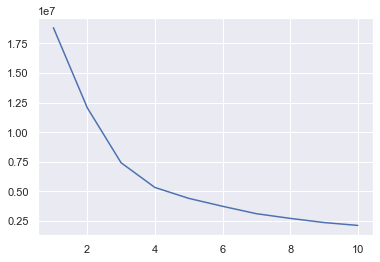

In [ ]:

WCSS=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,11), WCSS)
plt.show()

In [ ]:

km=KMeans(4)
km.fit(x)


KMeans(n_clusters=4)

In [ ]:
y=km.fit_predict(x)

In [ ]:
data1=data.copy()
data1['label']=y
y.shape
x.shape

(2200, 7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit_transform(x_train, y_train)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
prediction=model.predict((np.array([[100,70,45,30,110,6,250]])))
print("the crop is:" , prediction)

the crop is: [3]
